# Homework 4: Image Segmentation and Pixel Classification

Name: Syed Zain Raza

In [7]:
# optional: allow Jupyter to "hot reload" the Python modules I wrote, to avoid restarting the kernel after every change
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import glob

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import util
from util.clustering import KMeans

DATA_PATH = "./cs558F21_HW4_data/*"

In [9]:
img_paths = glob.glob(DATA_PATH)

In [10]:
print(img_paths)

['./cs558F21_HW4_data/sky', './cs558F21_HW4_data/white-tower.png', './cs558F21_HW4_data/wt_slic.png']


## Problem 1: K-Means Segmentation

In [11]:
white_tower_img = util.load_image(
    img_paths[1],
    return_array=True,
    return_grayscale=False,
)

Dimensions of ./cs558F21_HW4_data/white-tower.png: 720 x 1280 x 3


In [6]:
rgb_side_by_side = np.reshape(white_tower_img, (-1, 3), order="C")

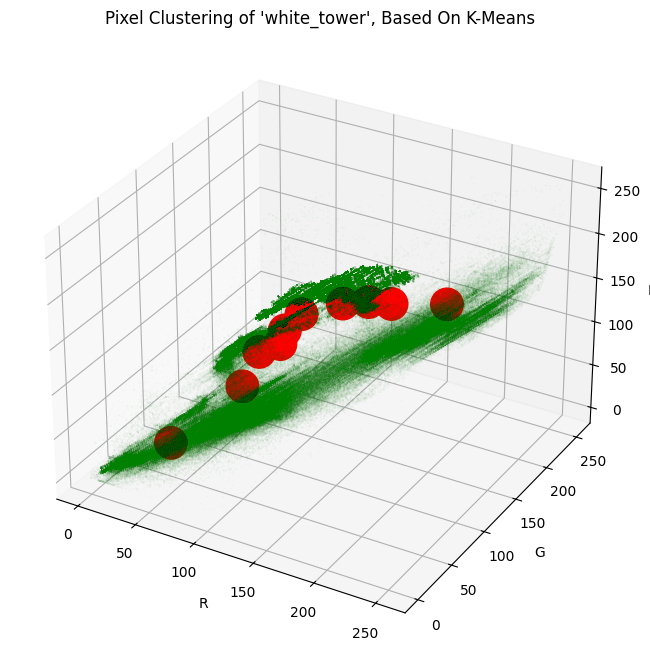

In [61]:
KMeans.fit_and_visualize(
    rgb_side_by_side,
    {"x": "R", "y": "G", "z": "B"},
    num_clusters=10,
    plot_title="Pixel Clustering of 'white_tower', Based On K-Means",
    max_iter=10_000_000_000,
    figsize=(8, 24),
)

The label for the Z-axis above is "B" (for some reason it got cropped).

## Problem 2: SLIC

In [47]:
from util.superpixels import SLIC

### 2A. SLIC on the White Tower

In [48]:
white_tower_img = util.load_image(
    img_paths[1],
    return_array=True,
    return_grayscale=False,
)

Dimensions of ./cs558F21_HW4_data/white-tower.png: 720 x 1280 x 3


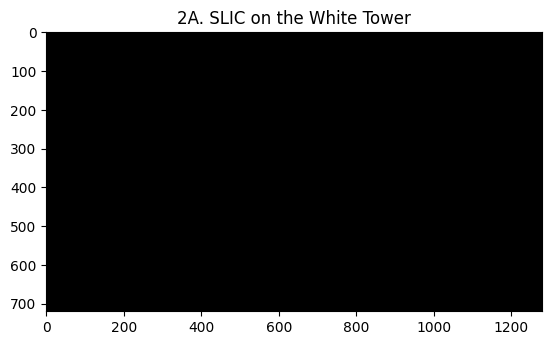

In [49]:
SLIC.execute_and_visualize(
    white_tower_img,
    step_size=50,
    max_iter=3,
    xy_scaling_factor=2,
    plot_title="2A. SLIC on the White Tower",
    logging=False,  # for now, suppress the warnings
)

### 2B. SLIC on the "Caramel Tower"

(I have no idea if that's actually the name of the building in the `wt_slic.png` image).

In [50]:
caramel_tower_img = util.load_image(
    img_paths[2],
    return_array=True,
    return_grayscale=False,
)

Dimensions of ./cs558F21_HW4_data/wt_slic.png: 500 x 750 x 3


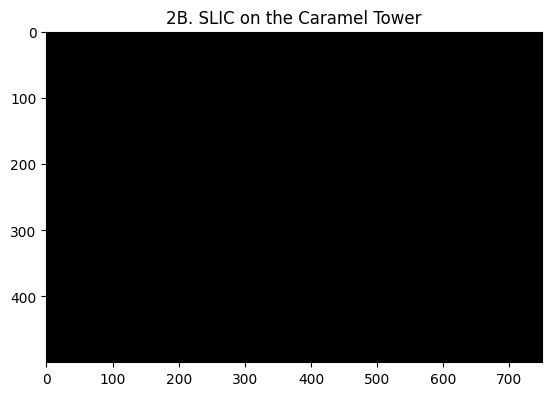

In [51]:
SLIC.execute_and_visualize(
    caramel_tower_img,
    step_size=50,
    max_iter=3,
    xy_scaling_factor=2,
    plot_title="2B. SLIC on the Caramel Tower",
    logging=False,  # for now, suppress the warnings
)

## Problem 3: Pixel Classification

### Load the Training Images

In [52]:
sky_img_paths = glob.glob(f"{img_paths[0]}/*")

In [53]:
print(sky_img_paths)


['./cs558F21_HW4_data/sky/non_sky_mask_train.jpg', './cs558F21_HW4_data/sky/sky_test4.jpg', './cs558F21_HW4_data/sky/sky_test1.jpg', './cs558F21_HW4_data/sky/sky_test2.jpg', './cs558F21_HW4_data/sky/sky_test3.jpg', './cs558F21_HW4_data/sky/sky_train.jpg']


In [54]:
original_img = util.load_image(
    sky_img_paths[-1],
    return_grayscale=False,
    return_array=True
)

Dimensions of ./cs558F21_HW4_data/sky/sky_train.jpg: 256 x 256 x 3


In [55]:
mask_img = util.load_image(
    sky_img_paths[0],
    return_grayscale=False,
    return_array=True
)

Dimensions of ./cs558F21_HW4_data/sky/non_sky_mask_train.jpg: 256 x 256 x 3


### Train the Classifier

In [61]:
from util.classification import PixelClassifier

In [42]:
clf = PixelClassifier(original_img, mask_img)

In [43]:
clf.train(num_clusters_per_class=10, max_iter=1_000_000_000_000)

### Predict on the Test Images

Dimensions of ./cs558F21_HW4_data/sky/sky_test4.jpg: 256 x 256 x 3


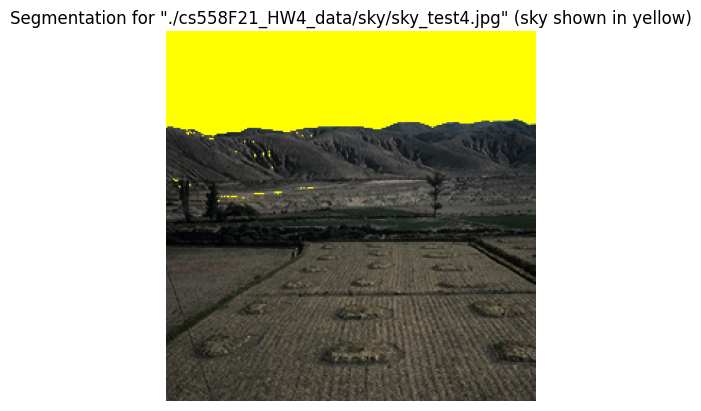

Dimensions of ./cs558F21_HW4_data/sky/sky_test1.jpg: 256 x 256 x 3


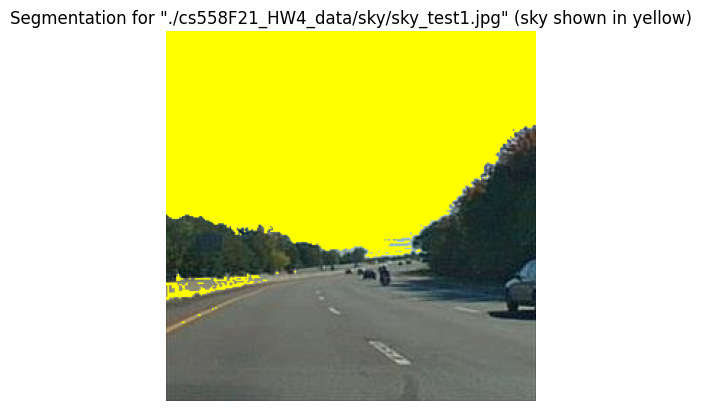

Dimensions of ./cs558F21_HW4_data/sky/sky_test2.jpg: 256 x 256 x 3


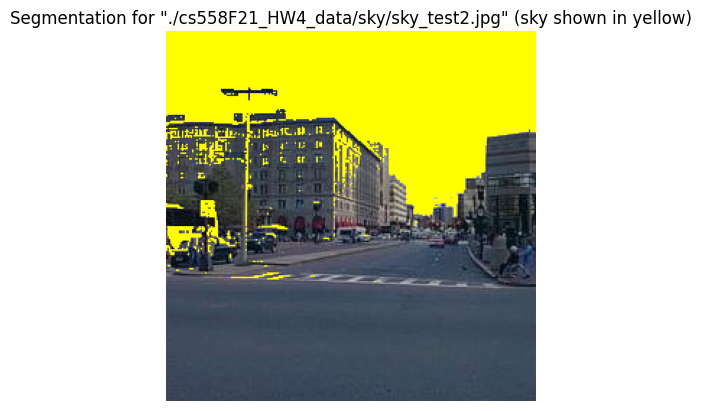

Dimensions of ./cs558F21_HW4_data/sky/sky_test3.jpg: 256 x 256 x 3


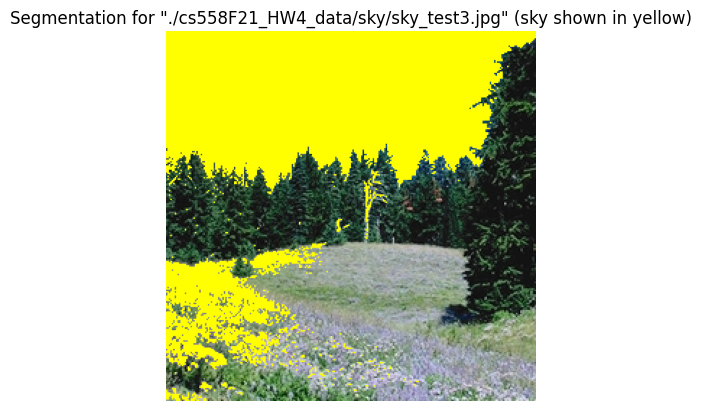

In [62]:
test_img_paths = sky_img_paths[1:-1]

for test_img_path in test_img_paths:
    test_img = util.load_image(
        test_img_path,
        return_grayscale=False,
        return_array=True
    )
    clf.predict(
        test_img,
        test_img_title=test_img_path,
        positive_class_name="sky",
    )